In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import datetime

In [29]:
directory = '/home/gaurav/Projects/DMRG_HK/output/clust_out/charge_gap/'

# Get details of all files in the specified directory
file_details = []
for f in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, f)):
        file_info = os.stat(os.path.join(directory, f))
        file_details.append({
            'name': f,
            'size': file_info.st_size,
            'modified': datetime.datetime.fromtimestamp(file_info.st_mtime)
        })
        print(f)

Charge_gap_1D_20240923-OBC.pkl
Charge_gap_1D_20240925-034410.pkl


In [27]:
file_path = directory + file_details[2]['name']

with open(file_path, 'rb') as file:
    data_dict = pickle.load(file)


In [24]:
U_list = data_dict['U_list'] 
norb_list = data_dict['norb_list'] 
raw_energy_dat = data_dict['raw_energy'] 
t = data_dict['t'] 
chi_max = data_dict['chi_max']
sweeps = data_dict['sweeps']
duration = data_dict['duration']

In [21]:
charge_gap_list_obc = np.zeros(shape=(len(U_list), len(norb_list)))
for i, U in enumerate(U_list):
    for j, norb in enumerate(norb_list):
        charge_gap_avg = 2*(raw_energy_dat[i,j,1,5] - raw_energy_dat[i,j,0,5])
        charge_gap_list_obc[i,j] = charge_gap_avg

Text(0.5, 1.0, 'Charge Gap 1D OBC')

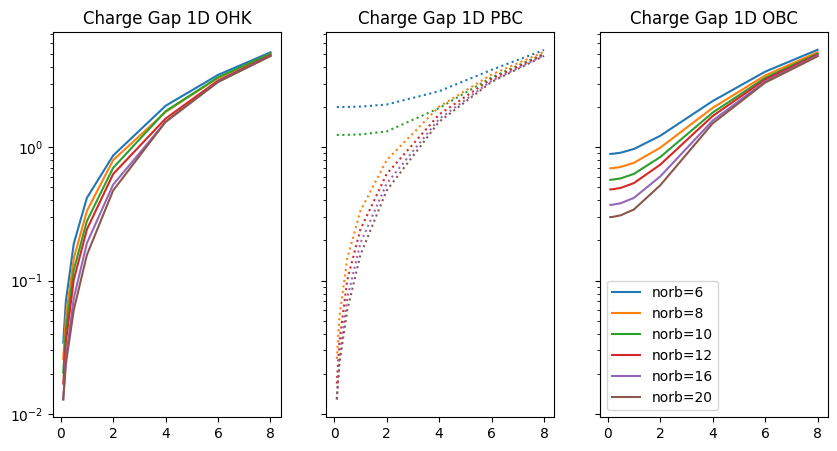

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

charge_gap_list_OHK = np.zeros(shape=(len(U_list), len(norb_list)))
charge_gap_list_twist = np.zeros_like(charge_gap_list_OHK)

for i, U in enumerate(U_list):
    for j, norb in enumerate(norb_list):
        charge_gap = (raw_energy_dat[i,j,1,:] - raw_energy_dat[i,j,0,:]).min()
        charge_gap_list_OHK[i,j] = 2*charge_gap

        charge_gap_avg = 2*(raw_energy_dat[i,j,1,5] - raw_energy_dat[i,j,0,5])
        charge_gap_list_twist[i,j] = charge_gap_avg

for j, norb in enumerate(norb_list):
    ax1.plot(U_list, charge_gap_list_OHK[:,j], label='norb='+str(norb))
    ax2.plot(U_list, charge_gap_list_twist[:,j], label='norb='+str(norb), linestyle=':')
    ax3.plot(U_list, charge_gap_list_obc[:, j], label='norb='+str(norb))
plt.legend()
plt.yscale('log')
ax1.set_title('Charge Gap 1D OHK')
ax2.set_title('Charge Gap 1D PBC')
ax3.set_title('Charge Gap 1D OBC')

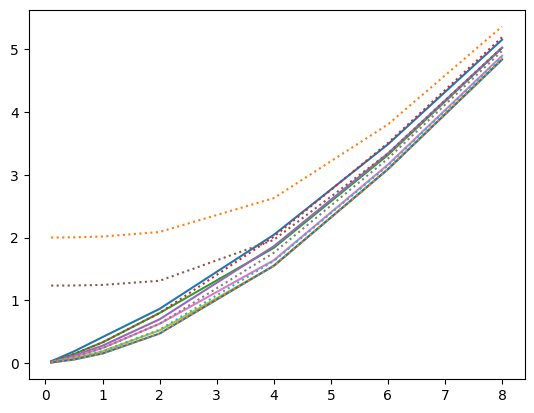

In [32]:
for j, norb in enumerate(norb_list):
    plt.plot(U_list, charge_gap_list_OHK[:,j], label='norb='+str(norb))
    plt.plot(U_list, charge_gap_list_twist[:,j], label='norb='+str(norb), linestyle=':')

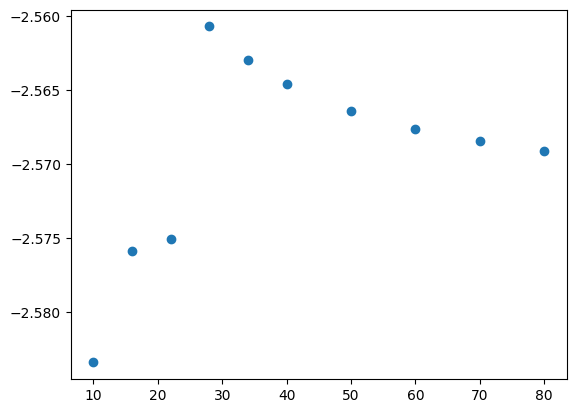

In [4]:
DMRG_PBC_GSE = np.array([-25.834262480057827, -41.21431402672376, -56.65225710604423, -71.7000059811895, -87.14162369219392, -102.58336142121787, 
                        -128.31990636086195, -154.05667359617158, -179.7935784476387, -205.53055150250404])

L_list = np.array([10, 16, 22, 28, 34, 40, 50, 60, 70, 80])

plt.scatter(L_list, DMRG_PBC_GSE/L_list)